In [1]:
#! cp /usr/lib/x86_64-linux-gnu/libstdc++.so.6 \
#/home/ubuntu/anaconda3/envs/tensorflow_p36/bin/../lib/libstdc++.so.6
import model as m
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_image_size = (330, 440)
batch_size = 64
model = load_model('Xception3.h5')
feature_output = model.layers[131].output
model2 = Model(model.input, [feature_output, model.output])

In [3]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator = gen.flow_from_directory('./imgs/valid3',  model_image_size, \
                                          shuffle=False, batch_size=batch_size, class_mode="categorical")

gen2 = ImageDataGenerator()
valid_generator2 = gen2.flow_from_directory('./imgs/valid3',  model_image_size, \
                                          shuffle=False, batch_size=batch_size, class_mode="categorical")

steps_valid_sample = int(valid_generator.samples)//batch_size + 1
img = []
y_trues = []

i = 0
for _, y in valid_generator:
    y_trues.extend(y)
    i += 1
    if i== steps_valid_sample:break
        
i = 0
for x, _ in valid_generator2:
    img.extend(x)
    i += 1
    if i== steps_valid_sample:break

img = np.array(img)

Found 1847 images belonging to 10 classes.
Found 1847 images belonging to 10 classes.


In [4]:
imgs = np.zeros((1847, model_image_size[0], model_image_size[1], 3), dtype=np.uint8)
for i in range(img.shape[0]):
#    img[i] = img[i][:, :, ::-1]
    img[i] = cv2.resize(img[i], (model_image_size[1], model_image_size[0]))
    imgs[i] = img[i]
features, y_preds = m.predict_model(model2, valid_generator, steps_valid_sample)
weights = model.layers[134].get_weights()[0]

29/29 [==============================] - 74s 3s/step


In [5]:
right, wrong = [], []
for idx in range(len(y_trues)):
    if np.argmax(y_trues[idx]) == np.argmax(y_preds[idx]):
        right.append(idx)
    else:
        wrong.append(idx)

In [6]:
wrong

[2,
 37,
 52,
 1111,
 1252,
 1486,
 1611,
 1664,
 1665,
 1668,
 1670,
 1674,
 1676,
 1678,
 1682,
 1683,
 1693,
 1695,
 1697,
 1698,
 1699,
 1701,
 1702,
 1703,
 1704,
 1705,
 1706,
 1711,
 1712,
 1713,
 1715,
 1716,
 1719,
 1720,
 1721,
 1724,
 1726,
 1727,
 1728,
 1731,
 1734,
 1736,
 1739,
 1740,
 1741,
 1742,
 1746,
 1748,
 1749,
 1750,
 1751,
 1752,
 1756,
 1758,
 1760,
 1761,
 1762,
 1764,
 1766,
 1767,
 1770,
 1772,
 1774,
 1777,
 1779,
 1780,
 1781,
 1782,
 1786,
 1790,
 1791,
 1796,
 1797,
 1798,
 1799,
 1801,
 1804,
 1807,
 1809,
 1811,
 1812,
 1813,
 1814,
 1816,
 1817,
 1818,
 1821,
 1822,
 1827,
 1829,
 1832,
 1834,
 1835,
 1836,
 1840,
 1841,
 1845]

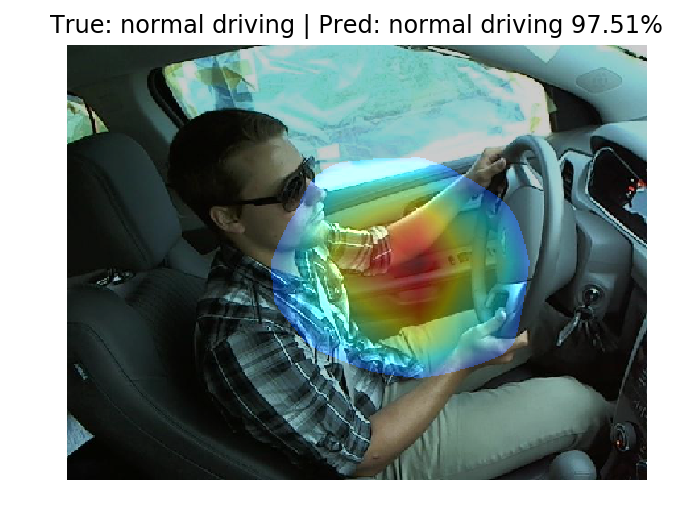

In [7]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 10)

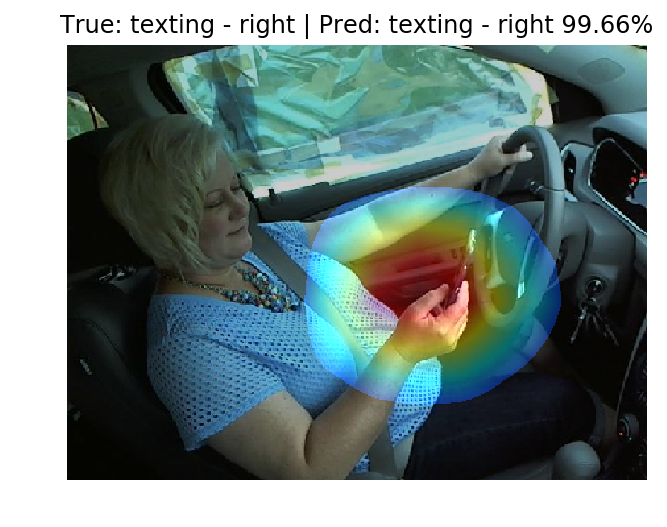

In [8]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 200)

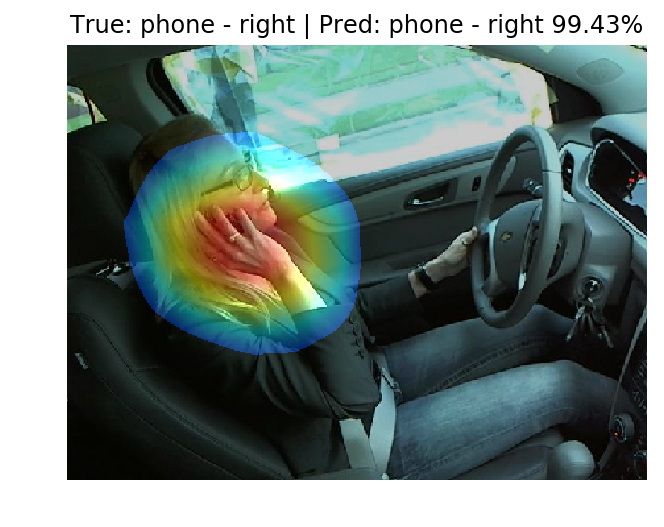

In [9]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 520)

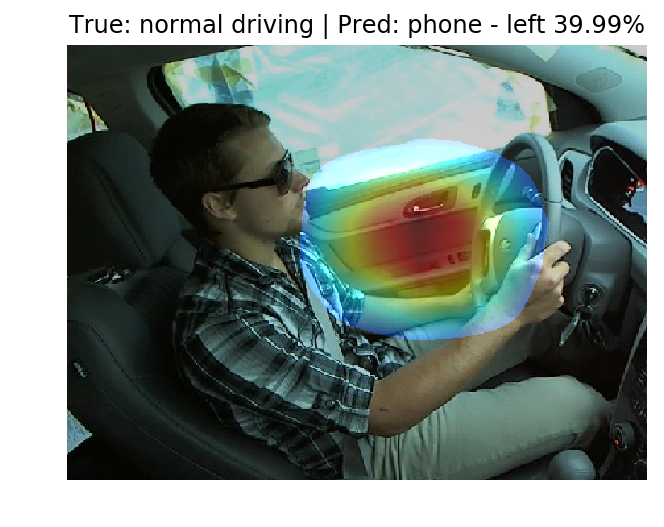

In [10]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 37)

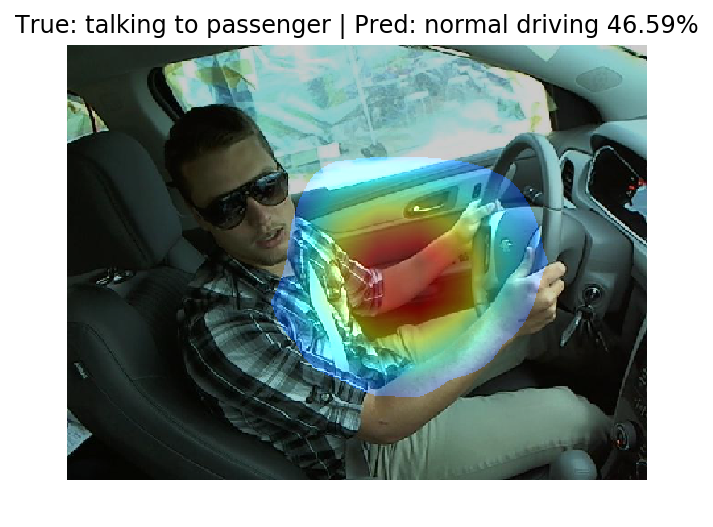

In [19]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 1715)

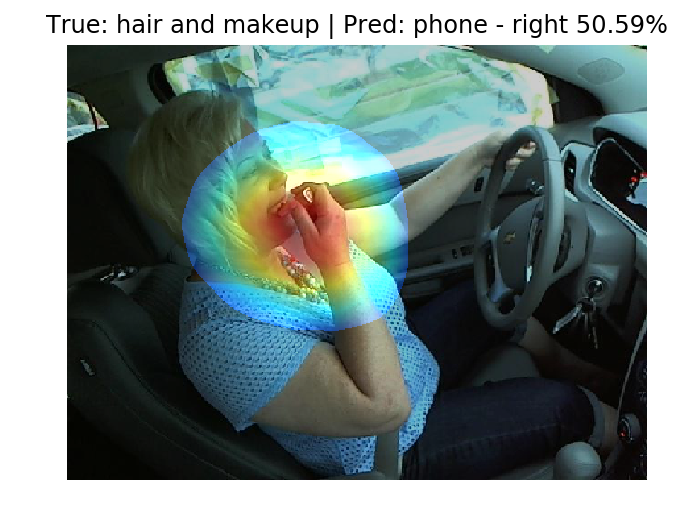

In [14]:
m.cam(imgs, features, y_trues, y_preds, weights, model_image_size, 1486)